# Deep Learning com OpenCV

O objetivo desse programa é fazer o uso de redes pré-treinadas de Deep Learning para a classificação de objetos, e não usar **GPU**.

### Modelo pré-treinado YOLO v3:

Nosso sistema modela a detecção como um problema de regressão. Ele divide a imagem em uma grade **SxS** e para cada célula da grade prevê *B bounding boxes* , com certa confiança na classificação dessas *B bounding boxes*, chamada de **C**. Cada Classe **C** possui uma probabilidades de classificação. Essas previsões são codificadas como um tensor **SxSx (B * 5 + C)**

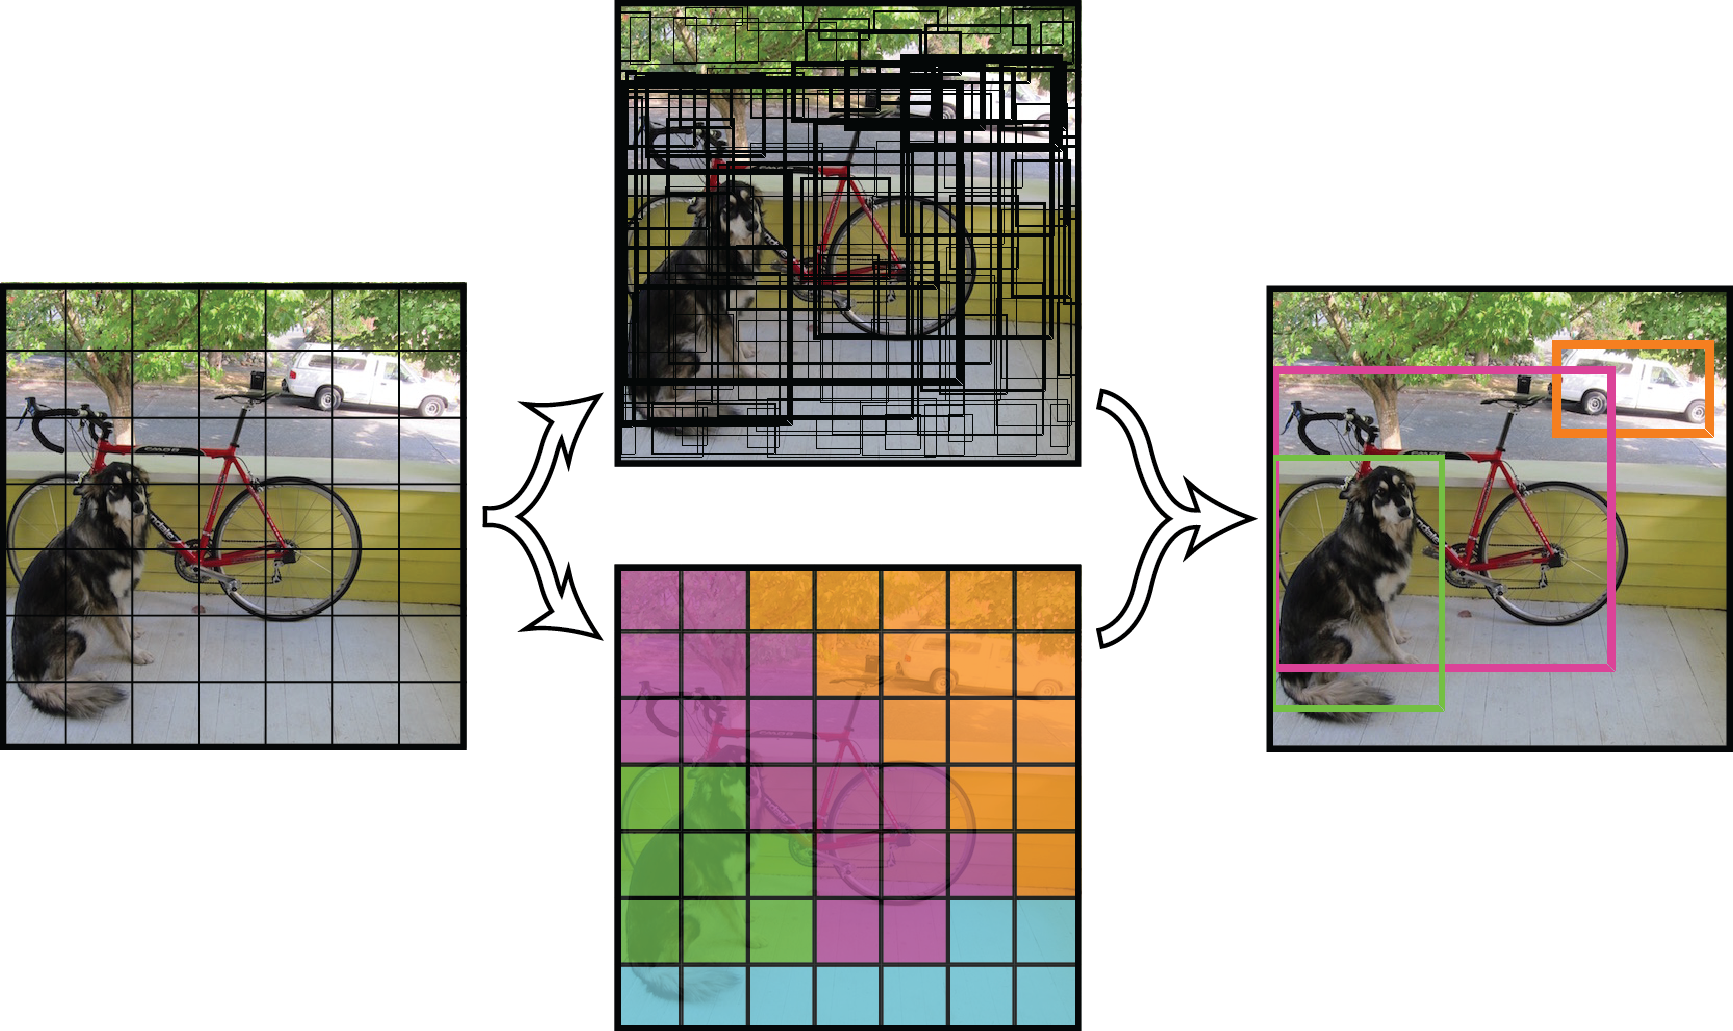


### Dataset:

[COCO](https://github.com/FelipeAmaral13/ProjetosDeepLearning/blob/master/Object%20Detection/coco.names)


### Download do modelo:

[Configuração Básica do nosso modelo (yolov3-tiny.cfg)](https://github.com/FelipeAmaral13/ProjetosDeepLearning/blob/master/Object%20Detection/yolov3-tiny.cfg)

[Pesos do nosso modelo já pré-treinado (yolov3-tiny.weights)](https://github.com/FelipeAmaral13/ProjetosDeepLearning/blob/master/Object%20Detection/yolov3-tiny.weights)


In [1]:
import cv2
import numpy as np

net = cv2.dnn.readNet("yolov3-tiny.weights","yolov3-tiny.cfg")

# Classes
classe = []

with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

layer_names = net.getLayerNames()

outputLayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors= np.random.uniform(0, 255, size=(len(classes), 3)) 


cap = cv2.VideoCapture('14 - Deep Learning com OpenCV_VIDEOEXEMPLO.mp4')

while True:
    ret,frame= cap.read()
    height, width, channels = frame.shape    
    
    #Detectando objetos
    # Funcao blob - basicamente extrai as caracteristicas dos objs
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (320, 320), (0, 0, 0), True)
    net.setInput(blob) # Passar as caracteristicas obtidas no blob na rede
    outs = net.forward(outputLayers) # Extrair todas as informacoes do objeto captado
    #print(outs[1])
    
    class_ids=[]
    confidences=[]
    boxes=[]
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                #Objeto detectato
                center_x= int(detection[0]*width)
                center_y= int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)                 
                # Coord retang
                x=int(center_x - w/2)
                y=int(center_y - h/2)
                boxes.append([x,y,w,h]) # Pegando as areas do retang
                confidences.append(float(confidence)) # Porcentagem do obj em relacao a confianca
                class_ids.append(class_id) #classe do obj
                # Eliminar caixas duplas do mesmo objeto
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)# Fazer os boundigboxes
    
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence= confidences[i]
            color = colors[class_ids[i]]
            cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
            cv2.putText(frame,label + " " + str(round(confidence,2)),(x,y+30),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),2)    
            cv2.imshow("Image",frame)    
    if cv2.waitKey(30) == 27: #esc key stops
        break

            
cap.release()
cv2.destoyAllWindows()

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


AttributeError: module 'cv2.cv2' has no attribute 'destoyAllWindows'